# Neural Networks: List 1

# Problem 2

* In Python, implement a class corresponding to the Hopfield Network:
  * It should allow for an arbitraty weight update method and usage of any activation function.
  * It should allow for both synchronous and asynchronous update of the memory state.
* Memorize the supplied binary maps (letters a-d). Check the ability to detect other signs.
* Print out all the 300 values in the weight matrix acquired in the training process.
* **Brain damage** From the set of all 300 weights nullify 50 or 100 of them. Check again its accuracy.

## Hopfield Network Class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
def signum(x):
  return 1 if x >= 0 else -1

In [3]:
def Hebb_rule(self, i, j, train):
  weight = 0
  for p in range(train.shape[0]):
    weight += train[p, i] * train[p, j]
  return weight    

In [4]:
class Hopfield:
  def __init__(self, number_of_bits, print_format, synchronous=False, activation_function=np.vectorize(signum),
               symmetric_weights=True, zero_self_interaction=True, weights_update=Hebb_rule):
    self.number_of_bits = number_of_bits
    self.synchronous = synchronous
    self.activation_function = activation_function
    self.weights = np.zeros((self.number_of_bits, self.number_of_bits))
    self.bias = np.zeros((self.number_of_bits,))
    self.symmetric_weights = symmetric_weights
    self.zero_self_interaction = zero_self_interaction
    self.weights_update = weights_update
    self.memory_state = np.zeros(self.number_of_bits)
    self.print_format = print_format
  
  def train(self, dataset):
    train_set = dataset.reshape(dataset.shape[0], -1)
    for i in range(self.number_of_bits):
      for j in range(self.number_of_bits):
        if self.zero_self_interaction and i == j:
          continue
        elif self.symmetric_weights and j < i:
          self.weights[i, j] = self.weights[j, i]
        else:
          self.weights[i, j] = self.weights_update(self, i, j, train_set)
    self.weights /= self.number_of_bits
  
  def update(self, state=None):
    if state is None:
      state = self.memory_state
    else:
      state = state.flatten()
    if self.synchronous:
      return self.synchronous_update(state=state)
    else:
      return self.asynchronous_update(state=state)

  def synchronous_update(self, state):
    new_state = (self.weights @ state.reshape((self.number_of_bits, 1)))
    new_state += self.bias.reshape((self.number_of_bits,1))
    self.memory_state = self.activation_function(new_state)
    return self.memory_state.reshape(self.print_format)
  
  def asynchronous_update(self, state):
    new_state = state
    for i in range(self.number_of_bits):
      new_state[i] = self.activation_function(self.weights[i, :] @ new_state + self.bias[i])
    self.memory_state = new_state
    return new_state.reshape(self.print_format)

## Dataset

### Loading

In [5]:
a=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,-1,-1,1]])
b=np.array([[-1,-1,-1,-1,-1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,-1,-1,1,1]])
c=np.array([[1,-1,-1,-1,-1],[-1,1,1,1,1],[-1,1,1,1,1],[-1,1,1,1,1],[1,-1,-1,-1,-1]])
d=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
train = np.array([a, b, c, d])
t1=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[-1,-1,1,1,-1],[1,-1,-1,-1,1]])
t2=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,1,-1,1,1]])
t3=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,-1,1,-1,1],[1,1,1,1,1],[-1,-1,-1,1,1]])
t4=np.array([[-1,-1,-1,-1,-1],[-1,1,1,1,-1],[-1,1,-1,1,1],[-1,1,1,-1,1],[1,-1,-1,-1,-1]])
t5=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t6=np.array([[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,1,-1,1,1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t7=np.array([[-1,-1,-1,1,-1],[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,-1,1,1,-1],[1,1,1,-1,1]])
t8=np.array([[-1,1,1,1,-1],[-1,-1,1,1,-1],[1,1,-1,-1,1],[-1,1,1,1,-1],[-1,1,1,1,1]])
t9=np.array([[-1,-1,-1,-1,1],[1,1,1,1,1],[-1,1,1,1,1],[-1,1,-1,-1,1],[-1,-1,1,1,1]])
t10=np.array([[-1,-1,1,1,-1],[-1,1,1,1,1],[1,1,1,-1,1],[1,1,1,1,1],[1,1,-1,-1,1]])
t11=np.array([[-1,-1,1,1,1],[1,1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,-1,-1,1],[-1,1,1,1,-1]])
t12=np.array([[1,-1,1,-1,1],[-1,1,1,1,-1],[1,-1,1,1,1],[-1,-1,-1,1,1],[1,-1,-1,1,-1]])
t13=np.array([[1,1,1,1,-1],[1,-1,1,-1,1],[1,1,1,1,-1],[-1,-1,1,1,-1],[-1,1,1,-1,1]])
test = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13])

### Example

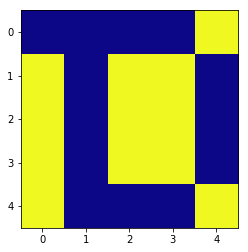

In [6]:
plt.imshow(train[0], cmap='plasma')

## Training

In [7]:
network = Hopfield(25, (5, 5), synchronous=False)
network.train(train)

Checking the responses on the training set.

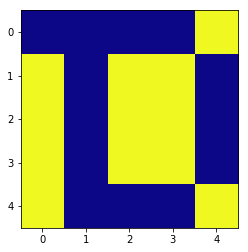

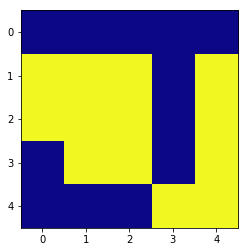

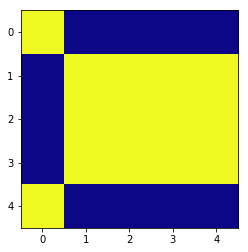

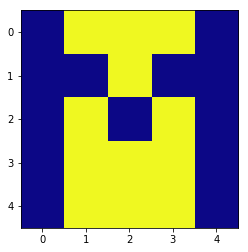

In [8]:
for i in range(4):
  plt.imshow(network.update(train[i]), cmap='plasma')
  plt.show()

## Tests

Checking the respones of the network in a single iteration for every sample from the test set.

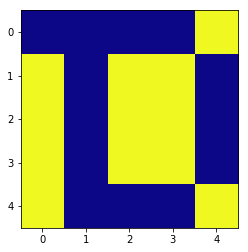

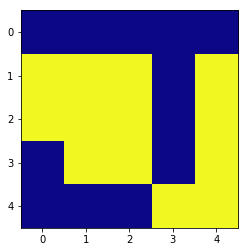

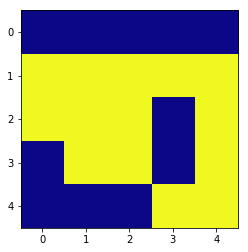

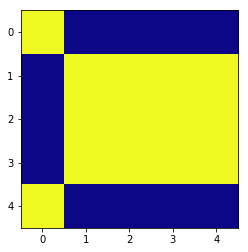

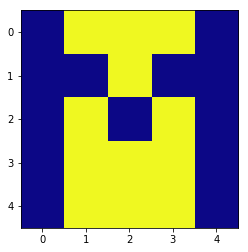

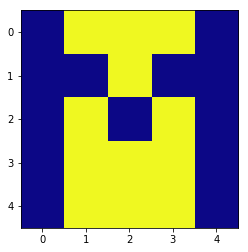

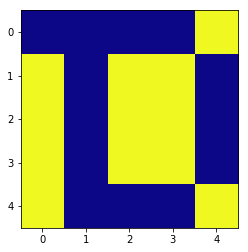

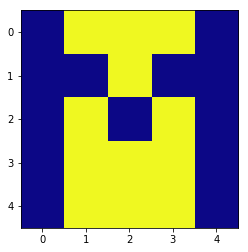

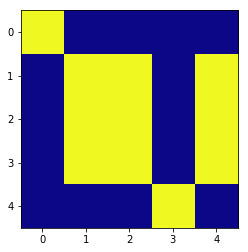

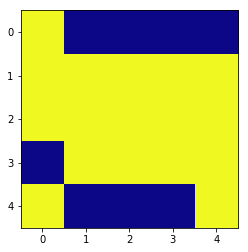

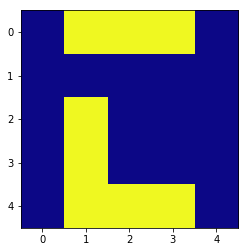

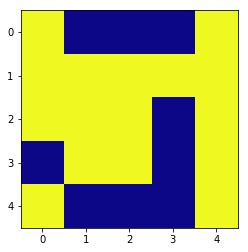

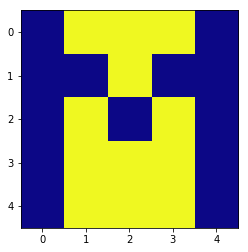

In [9]:
for i in range(test.shape[0]):
  plt.imshow(network.update(test[i]), cmap='plasma')
  plt.show()

As we can see, not all of the states are convering to the trainig samples.

### Checking the slowly converging examples

It can happen that after more than one iteration it converges.

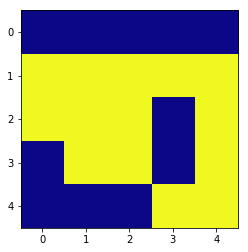

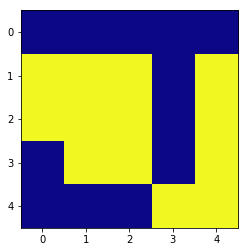

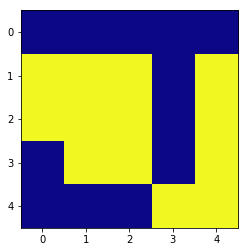

In [42]:
plt.imshow(network.update(test[2]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network.update(), cmap='plasma')
  plt.show()

Below, we get a new stable state.

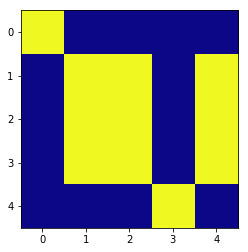

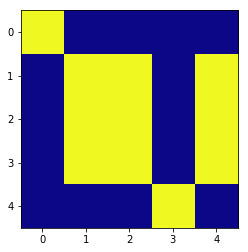

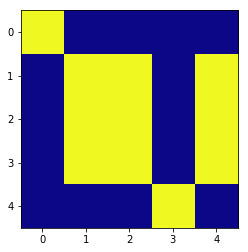

In [43]:
plt.imshow(network.update(test[8]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network.update(), cmap='plasma')
  plt.show()

Below, we get another new stable state.

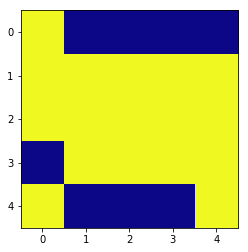

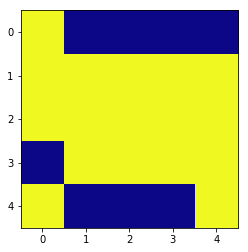

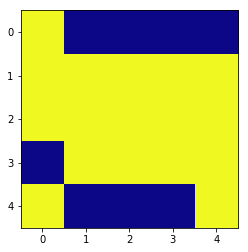

In [12]:
plt.imshow(network.update(test[9]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network.update(), cmap='plasma')
  plt.show()

And another one.

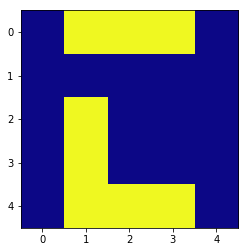

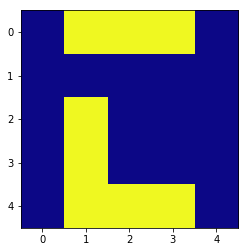

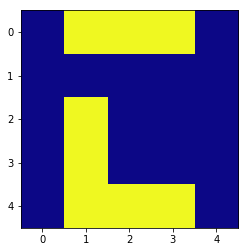

In [44]:
plt.imshow(network.update(test[10]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network.update(), cmap='plasma')
  plt.show()

## Weights

In general, the weight matrix consists of $25\cdot25=625$ elements. But taking in the account the the $25$ diagonal are vanishing and the symmetricity of the matrix, there are $(625-25)/2=300$ meaningful elements.

In [15]:
weights = []
for i in range(25):
  weights.extend(network.weights[i,i+1:].tolist())
weights = pd.Series(weights)

There are only $5$ uniqe values.

In [16]:
weights.value_counts()

 0.00    109
-0.08    102
 0.08     54
 0.16     24
-0.16     11
dtype: int64

## Brain damage

We nullify 50 (then 100) weight matrix elements to see whether it is really damage-proof.

### Nullify 50

In [17]:
network_dmg50 = Hopfield(25, (5, 5), synchronous=False)
network_dmg50.train(train)
to_dmg = []
while len(to_dmg) < 50:
  temp_pair = np.random.randint(size=(2,), low=0, high=25)
  if temp_pair[0] != temp_pair[1]:
    to_dmg.append(temp_pair)

In [18]:
for pair in to_dmg:
  network_dmg50.weights[pair[0], pair[1]] = 0
  network_dmg50.weights[pair[1], pair[0]] = 0

We get a divergence already on the train set as the J-like state changed a pixel (1, 3).

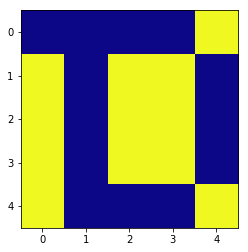

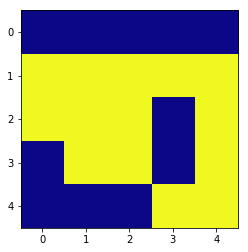

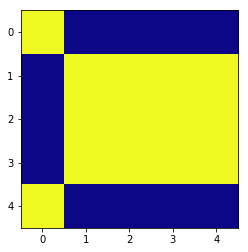

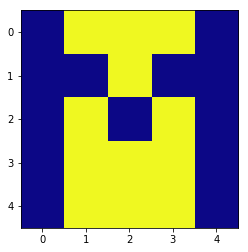

In [19]:
for i in range(4):
  plt.imshow(network_dmg50.update(train[i]), cmap='plasma')
  plt.show()

### Tests - after brain damage

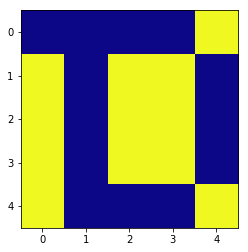

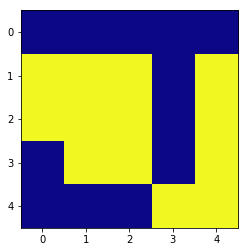

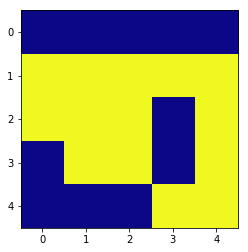

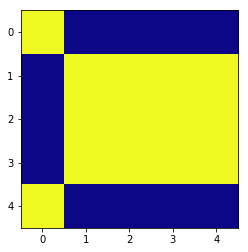

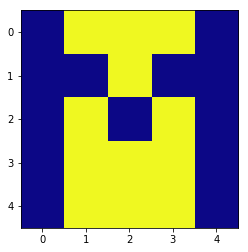

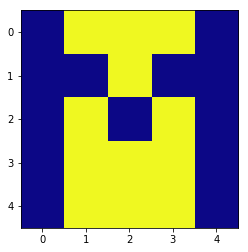

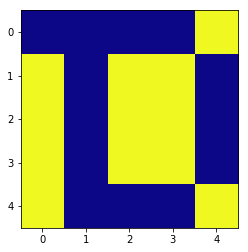

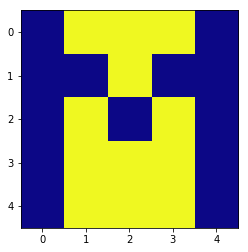

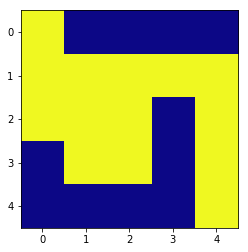

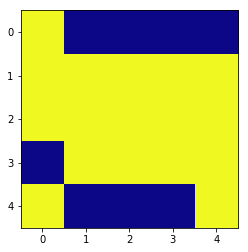

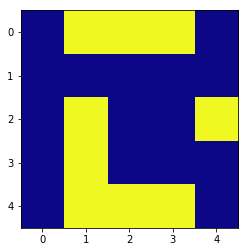

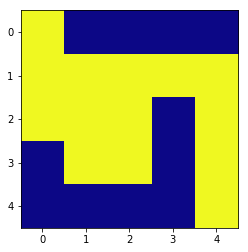

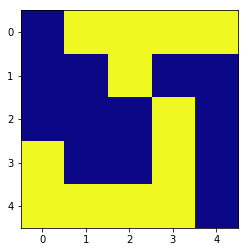

In [20]:
for i in range(test.shape[0]):
  plt.imshow(network_dmg50.update(test[i]), cmap='plasma')
  plt.show()

### Checking the slowly converging examples

Below, we get a stable J-like pattern with simple with difference in (1, 3).

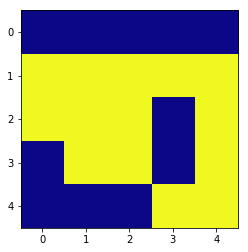

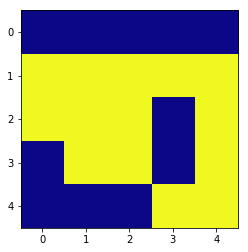

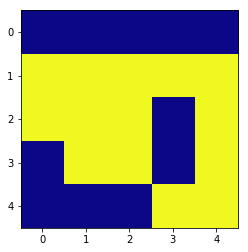

In [45]:
plt.imshow(network_dmg50.update(test[2]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg50.update(), cmap='plasma')
  plt.show()

Below, we get another new stable J-like state.

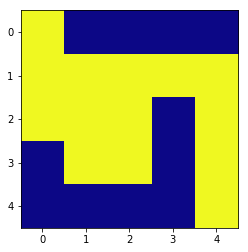

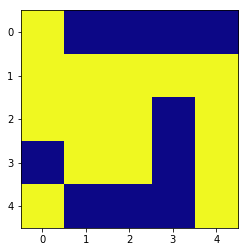

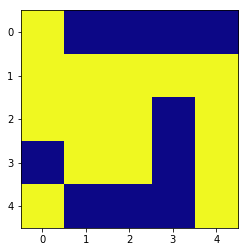

In [22]:
plt.imshow(network_dmg50.update(test[8]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg50.update(), cmap='plasma')
  plt.show()

Below, we get the same stable state as in regularly trained network.

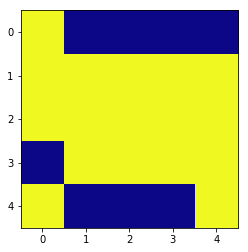

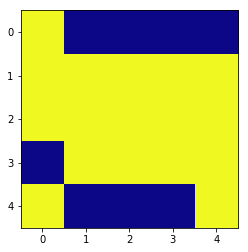

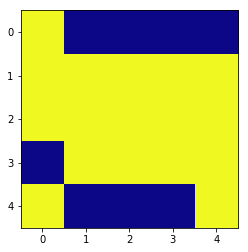

In [23]:
plt.imshow(network_dmg50.update(test[9]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg50.update(), cmap='plasma')
  plt.show()

Below, appears new stabel state which was not present in the reguraly trained network.

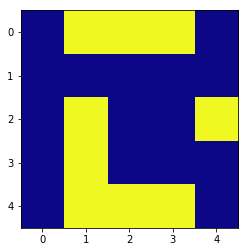

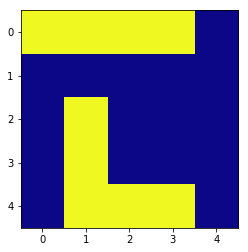

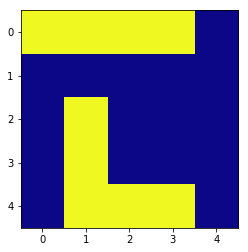

In [24]:
plt.imshow(network_dmg50.update(test[10]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg50.update(), cmap='plasma')
  plt.show()

Here, we get a negative J-like state.

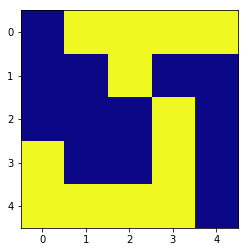

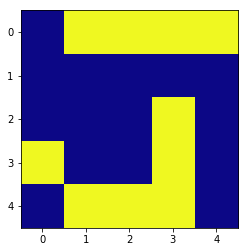

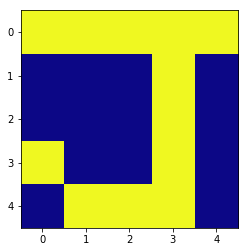

In [25]:
plt.imshow(network_dmg50.update(test[-1]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg50.update(), cmap='plasma')
  plt.show()

### Nullify 100

In [27]:
network_dmg100 = Hopfield(25, (5, 5), synchronous=False)
network_dmg100.train(train)
to_dmg = []
while len(to_dmg) < 100:
  temp_pair = np.random.randint(size=(2,), low=0, high=25)
  if temp_pair[0] != temp_pair[1]:
    to_dmg.append(temp_pair)

In [28]:
for pair in to_dmg:
  network_dmg100.weights[pair[0], pair[1]] = 0
  network_dmg100.weights[pair[1], pair[0]] = 0

Now, we can see that the J-like state is stable again.

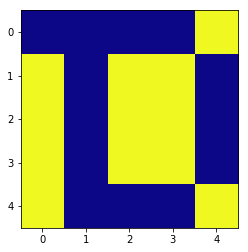

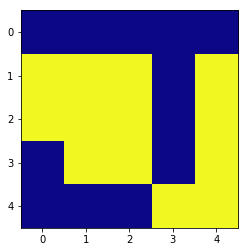

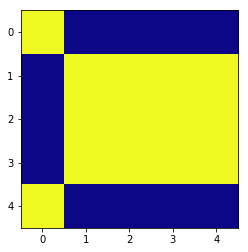

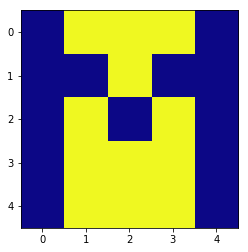

In [29]:
for i in range(4):
  plt.imshow(network_dmg100.update(train[i]), cmap='plasma')
  plt.show()

### Tests - after brain damage

Interetingly, the first part of the test set converges faster, but there are some new states in the second part.

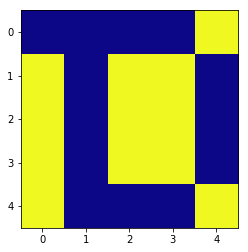

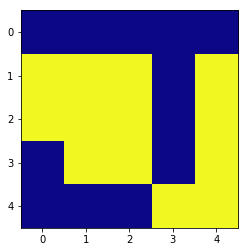

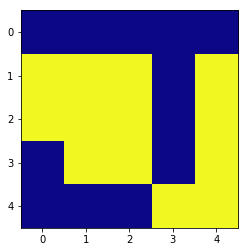

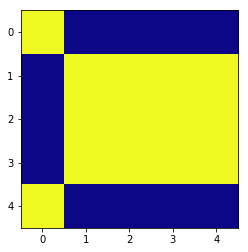

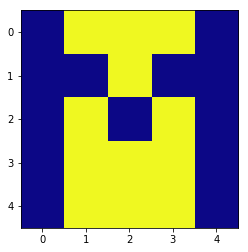

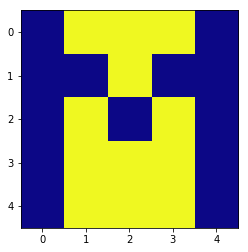

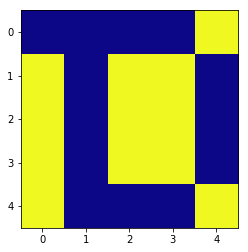

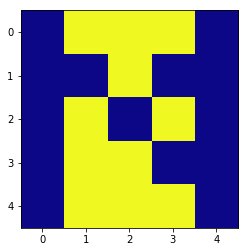

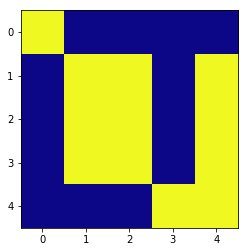

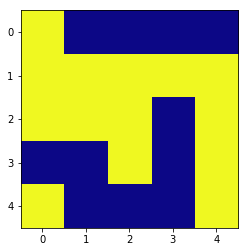

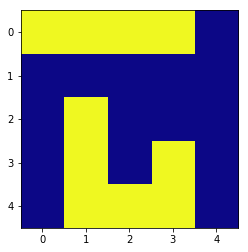

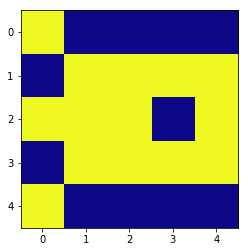

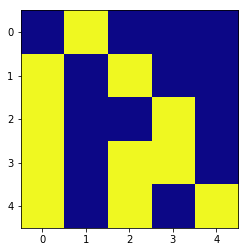

In [30]:
for i in range(test.shape[0]):
  plt.imshow(network_dmg100.update(test[i]), cmap='plasma')
  plt.show()

### Checking the slowly converging examples

It can happen that after more than one iteration it converges.

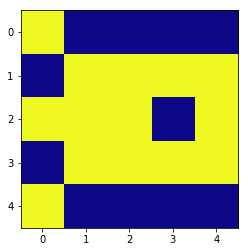

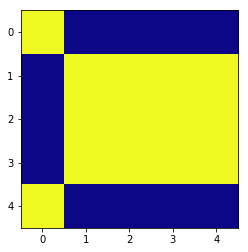

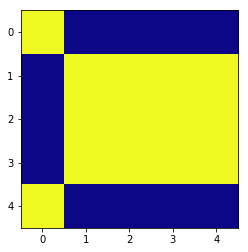

In [48]:
plt.imshow(network_dmg100.update(test[11]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg100.update(), cmap='plasma')
  plt.show()

Below, we get convergence to a training state what did not happen before.

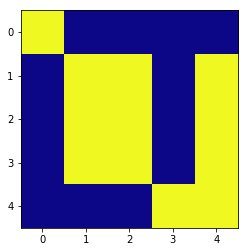

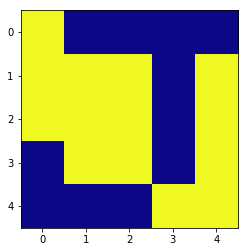

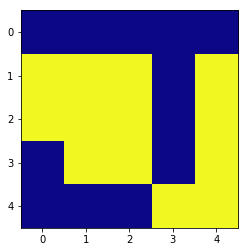

In [32]:
plt.imshow(network_dmg100.update(test[8]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg100.update(), cmap='plasma')
  plt.show()

Below, we get another new stable state.

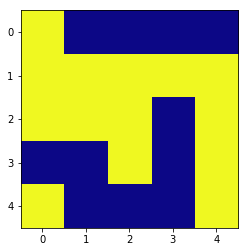

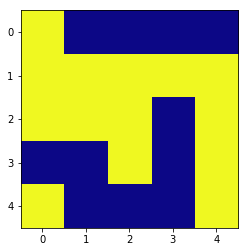

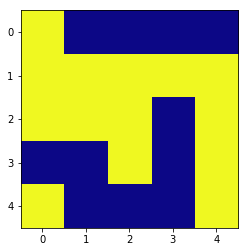

In [33]:
plt.imshow(network_dmg100.update(test[9]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg100.update(), cmap='plasma')
  plt.show()

And another one.

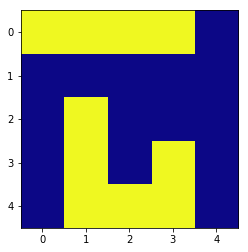

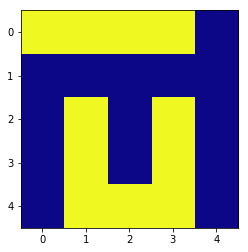

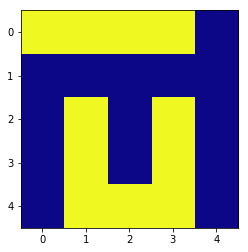

In [34]:
plt.imshow(network_dmg100.update(test[10]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg100.update(), cmap='plasma')
  plt.show()

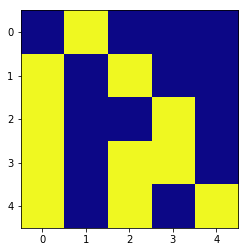

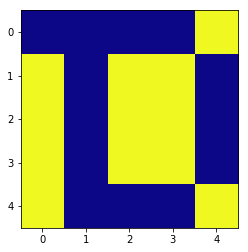

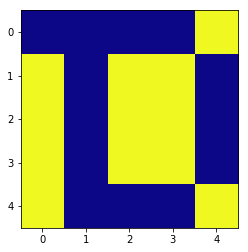

In [35]:
plt.imshow(network_dmg100.update(test[-1]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg100.update(), cmap='plasma')
  plt.show()

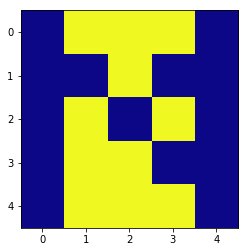

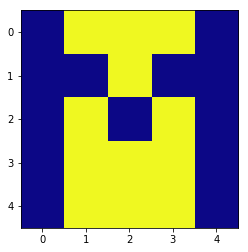

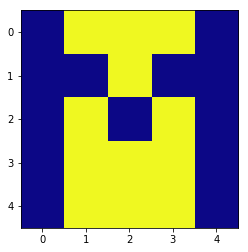

In [47]:
plt.imshow(network_dmg100.update(test[7]), cmap='plasma')
plt.show()
for i in range(2):
  plt.imshow(network_dmg100.update(), cmap='plasma')
  plt.show()

## Conclusion
First of all, the network is operational even without 50 or 100 of its weights. It seems, that the more damaged the network is the fewer attractors it has in the phase space - the training states are stronger attractors.

# Problem 1

Consider the following patterns:
$$\xi^1=\{1, -1, 1, 1, -1\},\quad \xi^2=\{1, 1, 1, 1, 1\}, \quad\xi^3=\{1, -1, -1, 1, 1\}.$$
Check whether the states are stable for the networks where: 
* $w_{ii}=0$ 
* $w_{ii}\ne0$. 

In [37]:
p1_net = Hopfield(5, (5,), zero_self_interaction=True)
p1_set = np.array([[1, -1, 1, 1, -1], [1,1,1,1,1], [1,-1,-1,1,1]])
p1_net.train(p1_set)
p1_net.weights

array([[ 0. , -0.2,  0.2,  0.6,  0.2],
       [-0.2,  0. ,  0.2, -0.2,  0.2],
       [ 0.2,  0.2,  0. ,  0.2, -0.2],
       [ 0.6, -0.2,  0.2,  0. ,  0.2],
       [ 0.2,  0.2, -0.2,  0.2,  0. ]])

In [38]:
for j in range(p1_set.shape[0]):
  print(f'State: {p1_set[j]}')
  print(f'Difference between state and the reaction of the network {p1_set[j] - p1_net.update(p1_set[j])}')

State: [ 1 -1  1  1 -1]
Difference between state and the reaction of the network [ 0  0  0  0 -2]
State: [1 1 1 1 1]
Difference between state and the reaction of the network [0 0 0 0 0]
State: [ 1 -1 -1  1  1]
Difference between state and the reaction of the network [ 0  0 -2  0  0]


In [39]:
p1_net_si = Hopfield(5, (5,), zero_self_interaction=False)
p1_net_si.train(p1_set)
p1_net_si.weights

array([[ 0.6, -0.2,  0.2,  0.6,  0.2],
       [-0.2,  0.6,  0.2, -0.2,  0.2],
       [ 0.2,  0.2,  0.6,  0.2, -0.2],
       [ 0.6, -0.2,  0.2,  0.6,  0.2],
       [ 0.2,  0.2, -0.2,  0.2,  0.6]])

In [40]:
for j in range(p1_set.shape[0]):
  print(f'State: {p1_set[j]}')
  print(f'Difference between state and the reaction of the network {p1_set[j] - p1_net_si.update(p1_set[j])}')

State: [ 1 -1  1  1 -1]
Difference between state and the reaction of the network [0 0 0 0 0]
State: [1 1 1 1 1]
Difference between state and the reaction of the network [0 0 0 0 0]
State: [ 1 -1 -1  1  1]
Difference between state and the reaction of the network [0 0 0 0 0]


We can see that selfinteraction (the first example) leads to unstability of some state in contrary to the network with no selfinteraction where the states are stable.